In [2]:
# In this example we read the SQLite example database and query its contents


In [5]:
!sqlite3 chinook.db ".tables"

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [2]:
import sqlite3

In [6]:
conn = sqlite3.connect('chinook.db')

In [7]:
c = conn.cursor()

In [13]:
# do another
for row in c.execute('''
SELECT trackid, name, composer, unitprice
FROM tracks limit 10;
'''):
        print(row)


(1, 'For Those About To Rock (We Salute You)', 'Angus Young, Malcolm Young, Brian Johnson', 0.99)
(2, 'Balls to the Wall', None, 0.99)
(3, 'Fast As a Shark', 'F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman', 0.99)
(4, 'Restless and Wild', 'F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman', 0.99)
(5, 'Princess of the Dawn', 'Deaffy & R.A. Smith-Diesel', 0.99)
(6, 'Put The Finger On You', 'Angus Young, Malcolm Young, Brian Johnson', 0.99)
(7, "Let's Get It Up", 'Angus Young, Malcolm Young, Brian Johnson', 0.99)
(8, 'Inject The Venom', 'Angus Young, Malcolm Young, Brian Johnson', 0.99)
(9, 'Snowballed', 'Angus Young, Malcolm Young, Brian Johnson', 0.99)
(10, 'Evil Walks', 'Angus Young, Malcolm Young, Brian Johnson', 0.99)


In [16]:
for row in c.execute('''
SELECT
    trackid,
    name,
    composer,
    unitprice
FROM tracks limit 10;
'''):
        print(row)


(1, 'For Those About To Rock (We Salute You)', 'Angus Young, Malcolm Young, Brian Johnson', 0.99)
(2, 'Balls to the Wall', None, 0.99)
(3, 'Fast As a Shark', 'F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman', 0.99)
(4, 'Restless and Wild', 'F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman', 0.99)
(5, 'Princess of the Dawn', 'Deaffy & R.A. Smith-Diesel', 0.99)
(6, 'Put The Finger On You', 'Angus Young, Malcolm Young, Brian Johnson', 0.99)
(7, "Let's Get It Up", 'Angus Young, Malcolm Young, Brian Johnson', 0.99)
(8, 'Inject The Venom', 'Angus Young, Malcolm Young, Brian Johnson', 0.99)
(9, 'Snowballed', 'Angus Young, Malcolm Young, Brian Johnson', 0.99)
(10, 'Evil Walks', 'Angus Young, Malcolm Young, Brian Johnson', 0.99)


In [39]:
# Let's have some fun with data frames


In [17]:
import pandas

In [23]:
df = pandas.read_sql(""" 
SELECT
    trackid,
    name,
    composer,
    unitprice
FROM tracks 
""", conn)
df

,TrackId,Name,Composer,UnitPrice
0,1,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",0.99
1,2,Balls to the Wall,None,0.99
2,3,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",0.99
3,4,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",0.99
4,5,Princess of the Dawn,Deaffy & R.A. Smith-Diesel,0.99
...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,0.99


In [21]:
pandas.read_sql(""" 
SELECT
    trackid,
    name,
    composer,
    unitprice
FROM tracks WHERE unitprice <> 0.99
""", conn)

,TrackId,Name,Composer,UnitPrice
0,2819,Battlestar Galactica: The Story So Far,None,1.99
1,2820,Occupation / Precipice,None,1.99
2,2821,"Exodus, Pt. 1",None,1.99
3,2822,"Exodus, Pt. 2",None,1.99
4,2823,Collaborators,None,1.99
...,...,...,...,...
208,3362,"There's No Place Like Home, Pt. 1",None,1.99
209,3363,"There's No Place Like Home, Pt. 2",None,1.99
210,3364,"There's No Place Like Home, Pt. 3",None,1.99
211,3428,Branch Closing,None,1.99


In [24]:
df.dtypes


TrackId        int64
Name          object
Composer      object
UnitPrice    float64
dtype: object

In [25]:
df.drop(['Composer'], axis=1)

,TrackId,Name,UnitPrice
0,1,For Those About To Rock (We Salute You),0.99
1,2,Balls to the Wall,0.99
2,3,Fast As a Shark,0.99
3,4,Restless and Wild,0.99
4,5,Princess of the Dawn,0.99
...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",0.99


In [30]:
df.to_excel("pandasExcel.xlsx", "Sheet1")
df.to_json("pandas.json")

In [32]:
!ls -lhr 

total 1.6M
-rw-rw-r--. 1 jupyter jupyter 140K Jan 13 17:13 pandasExcel.xlsx
-rw-rw-r--. 1 jupyter jupyter 266K Jan 13 17:13 pandas.json
-rw-r--r--. 1 jupyter jupyter 8.0K Jan 13 14:55 example.db
-rw-r--r--. 1 jupyter jupyter 864K Jan 13 14:57 chinook.db
-rw-rw-r--. 1 jupyter jupyter  20K Jan 13 17:12 SQL example.ipynb
-r--r--r--. 1 jupyter jupyter 264K Jan 13 16:32 PIK3CA.vcf
-rw-rw-r--. 1 pjotrp  pjotrp  4.2K Jan 13 14:50 Day 1 - Create SQL database.ipynb


In [38]:
df_filtered = df.query('UnitPrice!=0.99')
df_filtered

,TrackId,Name,Composer,UnitPrice
2818,2819,Battlestar Galactica: The Story So Far,None,1.99
2819,2820,Occupation / Precipice,None,1.99
2820,2821,"Exodus, Pt. 1",None,1.99
2821,2822,"Exodus, Pt. 2",None,1.99
2822,2823,Collaborators,None,1.99
...,...,...,...,...
3361,3362,"There's No Place Like Home, Pt. 1",None,1.99
3362,3363,"There's No Place Like Home, Pt. 2",None,1.99
3363,3364,"There's No Place Like Home, Pt. 3",None,1.99
3427,3428,Branch Closing,None,1.99


In [40]:
# Ok, final one, read the VCF


In [46]:
vcf =  pandas.read_csv('PIK3CA.vcf', delimiter='\t', comment='#')
vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,009T,...,MBC549,MBC550,MBC551,MBC553,MBC556,MBC557,MBC558,MBC561,MBC563,MBC564
0,3,178916581,.,T,C,60.58,MappingQuality,AC=2;AF=5.495e-03;AN=364;ANN=C|5_prime_UTR_var...,GT:AD:DP:GQ:PGT:PID:PL,"0/0:11,0:11:33:.:.:0,33,495",...,"0/0:6,0:6:0:.:.:0,0,223","0/0:8,0:8:15:.:.:0,15,225","0/0:12,0:12:24:.:.:0,24,360","0/0:33,0:33:81:.:.:0,81,1215","0/0:22,0:22:25:.:.:0,25,1064","0/0:2,0:2:6:.:.:0,6,90","0/0:16,0:16:45:.:.:0,45,675","0/0:9,0:9:0:.:.:0,0,301","0/0:26,0:26:66:.:.:0,66,990","0/0:23,0:23:0:.:.:0,0,970"
1,3,178916644,.,T,G,187.06,LowQualityDepth;MappingQuality;SnpCluster;Stra...,AC=6;AF=0.017;AN=362;ANN=G|missense_variant|MO...,GT:AD:DP:GQ:PGT:PID:PL,"0/0:15,1:17:6:.:.:0,6,567",...,"0/0:13,0:13:0:.:.:0,0,339","0/0:10,0:10:0:.:.:0,0,263","0/0:15,0:15:0:.:.:0,0,638","0/0:30,1:31:51:.:.:0,51,1162","0/0:36,0:36:0:.:.:0,0,1615","0/0:7,0:7:18:.:.:0,18,270","0/0:38,0:38:0:.:.:0,0,1542","0/0:12,0:12:0:.:.:0,0,409","0/0:35,0:35:0:.:.:0,0,1473","0/0:36,0:36:0:.:.:0,0,1589"
2,3,178916645,COSM582519,G,T,427.05,MappingQuality;SnpCluster;StrandBias,AC=11;AF=0.030;AN=366;ANN=T|missense_variant|M...,GT:AD:DP:GQ:PGT:PID:PL,"0/0:24,0:24:0:.:.:0,0,1171",...,"0/0:13,0:13:0:.:.:0,0,339","0/0:10,0:10:0:.:.:0,0,263","0/0:14,0:14:23:.:.:0,23,786","0/0:48,0:48:0:.:.:0,0,1993","0/0:36,0:36:0:.:.:0,0,1615","0/0:7,0:7:0:.:.:0,0,275","0/0:24,1:25:40:.:.:0,40,883","0/0:12,0:12:0:.:.:0,0,409","0/1:20,2:22:5:0|1:178916643_G_T:5,0,893","0/1:22,2:24:2:0|1:178916643_G_T:2,0,1658"
3,3,178916651,COSM1420723,T,C,157.23,LowQualityDepth;MappingQuality;SnpCluster,AC=6;AF=0.017;AN=362;ANN=C|missense_variant|MO...,GT:AD:DP:GQ:PGT:PID:PL,"0/0:30,0:30:0:.:.:0,0,1085",...,"0/0:11,0:11:0:.:.:0,0,322","0/0:10,0:10:0:.:.:0,0,266","0/0:15,0:15:0:.:.:0,0,540","0/0:47,0:47:0:.:.:0,0,1598","0/0:32,0:32:0:.:.:0,0,1241","0/0:8,0:8:0:.:.:0,0,19","0/0:36,0:36:0:.:.:0,0,1336","0/0:8,0:8:0:.:.:0,0,287","0/0:24,0:24:0:.:.:0,0,977","0/0:33,0:33:0:.:.:0,0,1275"
4,3,178916931,COSM166340,C,A,391.68,MappingQuality,AC=1;AF=2.703e-03;AN=370;ANN=A|synonymous_vari...,GT:AD:DP:GQ:PL,"0/0:17,0:17:39:0,39,585",...,"0/0:17,0:17:33:0,33,495","0/0:16,0:16:33:0,33,495","0/0:8,0:8:21:0,21,315","0/0:44,0:44:99:0,99,1485","0/0:43,0:43:99:0,99,1485","0/0:3,0:3:6:0,6,90","0/0:34,0:34:81:0,81,1215","0/0:12,0:12:27:0,27,405","0/0:26,0:26:60:0,60,900","0/0:44,0:44:99:0,102,1530"
5,3,178917005,rs3729674,A,G,665.15,MappingQuality,AC=8;AF=0.667;AN=12;ANN=G|sequence_feature|LOW...,GT:AD:DP:GQ:PL,"./.:0,0:0",...,"./.:0,0:0","./.:0,0:0","./.:0,0:0","0/1:4,3:7:99:102,0,142","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0"
6,3,178917478,COSM751,G,A,96.06,MappingQuality,AC=1;AF=2.762e-03;AN=362;ANN=A|missense_varian...,GT:AD:DP:GQ:PL,"0/0:14,0:14:36:0,36,540",...,"0/0:4,0:4:12:0,12,180","0/0:5,0:5:15:0,15,225","0/0:2,0:2:6:0,6,90","0/0:32,0:32:90:0,90,1350","0/0:27,0:27:81:0,81,1215","0/0:2,0:2:6:0,6,90","0/0:25,0:25:72:0,72,1080","0/0:8,0:8:24:0,24,360","0/0:21,0:21:48:0,48,720","0/0:33,0:33:78:0,78,1170"
7,3,178919190,.,C,A,909.13,MappingQuality;StrandBias,AC=14;AF=0.038;AN=372;ANN=A|synonymous_variant...,GT:AD:DP:GQ:PL,"0/0:16,0:16:39:0,39,585",...,"0/0:11,0:11:3:0,3,403","0/0:11,0:11:0:0,0,105","0/0:1,0:1:3:0,3,45","0/1:32,6:38:99:138,0,880","0/0:49,0:49:0:0,0,1849","0/0:5,0:5:9:0,9,135","0/0:40,0:40:0:0,0,1410","0/0:6,0:6:0:0,0,87","0/0:11,0:11:0:0,0,341","0/0:33,0:33:0:0,0,952"
8,3,178921407,.,C,T,47.85,MappingQuality,AC=2;AF=5.348e-03;AN=374;ANN=T|synonymous_vari...,GT:AD:DP:GQ:PL,"0/0:32,0:32:81:0,81,1215",...,"0/0:21,0:21:57:0,57,855","0/0:20,0:20:54:0,54,810","0/0:2,0:2:6:0,6,90","0/0:33,0:33:99:0,99,1485","0/0:33,0:33:99:0,99,1485","0/0:6,0:6:12:0,12,180","0/0:39,0:39:99:0,99,1485","0/0:17,0:17:45:0,45,675","0/0:39,0:39:99:0,99,1485","0/0:43,0:43:99:0,102,1530"
9,3,178921525,.,T,A,60.74,MappingQuality,AC=2;AF=5.495e-03;AN=364;ANN=A|missense_varian...,GT:AD:DP:GQ:PL,"0/0:8,0:8:0:0,0,363",...,"0/0:5,0:5:0:0,0,158","0/0:5,0:5:0:0,0,213","0

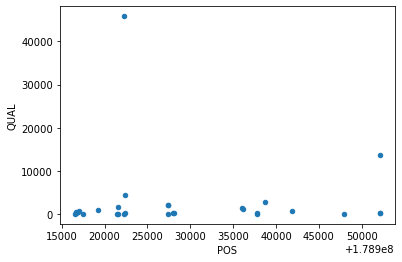

In [49]:
vcf.plot(x ='POS', y='QUAL', kind = 'scatter')

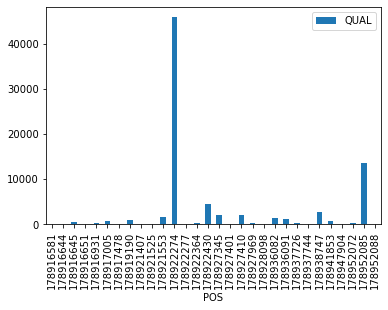

In [53]:
vcf.plot.bar(x ='POS', y='QUAL')

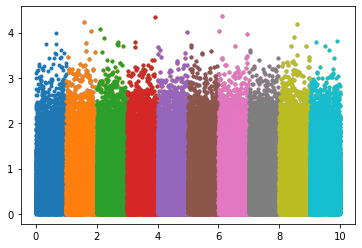

In [52]:
import matplotlib.pyplot as plt
from numpy.random import randn, random_sample

g = random_sample(int(1e5))*10 # uniform random values between 0 and 10
p = abs(randn(int(1e5))) # abs of normally distributed data

"""
plot g vs p in groups with different colors
colors are cycled automatically by matplotlib
use another colormap or define own colors for a different cycle
"""
for i in range(1,11): 
    plt.plot(g[abs(g-i)<1], p[abs(g-i)<1], ls='', marker='.')

plt.show()
